<a href="https://colab.research.google.com/github/LiMirella/Pandas_base2/blob/main/C%C3%B3pia_de_desafios_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Descrição

Esse notebook foi construído para realizar os desafios propostos no final de cada aula do curso **Pandas: conhecendo a biblioteca**

## Aula 1: Conhecendo a base de dados

### Desafio 1
Importe o arquivo [**alunos.csv**](https://raw.githubusercontent.com/alura-cursos/pandas-conhecendo-a-biblioteca/main/desafios/alunos.csv) e armazene seu conteúdo em um DataFrame Pandas

In [39]:
import pandas as pd
url = 'https://raw.githubusercontent.com/alura-cursos/pandas-conhecendo-a-biblioteca/main/desafios/alunos.csv'

In [40]:
dados = pd.read_csv(url)
dados.head()

,Nome,Idade,Notas,Aprovado
0,Ary,20,7.5,True
1,Ana,18,NaN,False
2,Cátia,27,2.5,False
3,Denis,18,5.0,False
4,Beto,21,10.0,True


### Desafio 2
Visualize as primeiras 7 linhas do DataFrame e as 5 últimas

In [41]:
dados.head(7)

,Nome,Idade,Notas,Aprovado
0,Ary,20,7.5,True
1,Ana,18,NaN,False
2,Cátia,27,2.5,False
3,Denis,18,5.0,False
4,Beto,21,10.0,True
5,Bruna,23,NaN,False
6,Dara,21,7.0,True


In [42]:
dados.tail(5)

,Nome,Idade,Notas,Aprovado
13,Mirla,25,9.0,True
14,Paulo,37,NaN,False
15,Mylena,29,7.0,True
16,Lucas,33,NaN,False
17,Nadia,34,8.0,True


### Desafio 3
Confira a quantidade de linhas e colunas do DataFrame

In [43]:
dados.shape

(18, 4)

### Desafio 4
Explore as colunas do DataFrame e analise os tipos dos dados presentes em cada coluna

In [44]:
dados.columns

Index(['Nome', 'Idade', 'Notas', 'Aprovado'], dtype='object')

In [45]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Nome      18 non-null     object 
 1   Idade     18 non-null     int64  
 2   Notas     12 non-null     float64
 3   Aprovado  18 non-null     bool   
dtypes: bool(1), float64(1), int64(1), object(1)
memory usage: 582.0+ bytes


In [46]:
dados['Nome']

,Nome
0,Ary
1,Ana
2,Cátia
3,Denis
4,Beto
5,Bruna
6,Dara
7,Carlos
8,Alice
9,Vitor


In [47]:
dados [['Nome', 'Notas']]

,Nome,Notas
0,Ary,7.5
1,Ana,NaN
2,Cátia,2.5
3,Denis,5.0
4,Beto,10.0
5,Bruna,NaN
6,Dara,7.0
7,Carlos,6.0
8,Alice,5.6
9,Vitor,NaN


### **Extra**
Calcule algumas estatísticas descritivas básicas dos dados do DataFrame (média, desvio padrão, etc) - Dica: pesquise pelo método **describe**

In [48]:
#Contando os alunos
dados['Nome'].astype(str).count()

np.int64(18)

In [49]:
#Média de notas
dados['Notas'].mean()

np.float64(6.8)

In [50]:
#Desvio padrão das notas
round(dados['Notas'].std(), 3)

2.205

In [51]:
#Maior nota
dados['Notas'].max()

10.0

In [52]:
#Menor nota
dados['Notas'].min()

2.5

## Aula 2: Análise exploratória dos dados

Para os desafios dessa aula, vamos utilizar a mesma base de dados que estamos utilizando para o desenvolvimento do nosso projeto. Sendo assim, na célula abaixo vamos realizar a importação dessa base de dados e aplicar as transformações já realizadas até o momento da aula 2.

In [53]:
import pandas as pd

In [54]:
# importando a base de dados
url = 'https://raw.githubusercontent.com/alura-cursos/pandas-conhecendo-a-biblioteca/main/base-de-dados/aluguel.csv'
dados = pd.read_csv(url, sep=';')

In [55]:
imoveis_comerciais = ['Conjunto Comercial/Sala',
                      'Prédio Inteiro', 'Loja/Salão',
                      'Galpão/Depósito/Armazém',
                      'Casa Comercial', 'Terreno Padrão',
                      'Loja Shopping/ Ct Comercial',
                      'Box/Garagem', 'Chácara',
                      'Loteamento/Condomínio', 'Sítio',
                      'Pousada/Chalé', 'Hotel', 'Indústria']

# removendo imóveis comerciais
df = dados.query('@imoveis_comerciais not in Tipo')

# selecionando apenas imóveis do tipo apartamento
df = df.query('Tipo == "Apartamento"')

# visualizando a base de dados
df.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
10,Apartamento,Centro,1,0,0,36,1200.0,NaN,NaN


### Desafio 1
Calcular a média de quartos por apartamento

In [56]:
round(df['Quartos'].mean(), 2)

np.float64(2.48)

### Desafio 2
Conferir quantos bairros únicos existem na nossa base de dados

In [57]:
df['Bairro'].unique()

array(['Centro', 'Higienópolis', 'Vista Alegre', 'Cachambi', 'Grajaú',
       'Lins de Vasconcelos', 'Copacabana', 'Freguesia (Jacarepaguá)',
       'Barra da Tijuca', 'Tijuca', 'Olaria', 'Ipanema', 'Botafogo',
       'Recreio dos Bandeirantes', 'Leblon', 'Jardim Oceânico', 'Humaitá',
       'Península', 'Méier', 'Vargem Pequena', 'Maracanã', 'Jacarepaguá',
       'Jardim Botânico', 'Vila Valqueire', 'Gávea', 'Cosme Velho',
       'Bonsucesso', 'Todos os Santos', 'Laranjeiras', 'Itanhangá',
       'Praça Seca', 'Lagoa', 'Catete', 'Jardim Carioca', 'Vila Isabel',
       'Rocha Miranda', 'Taquara', 'Engenho Novo', 'Campo Grande',
       'Flamengo', 'Engenho de Dentro', 'São Conrado', 'Cidade Nova',
       'Pilares', 'Tomás Coelho', 'Água Santa', 'São Cristóvão',
       'Ilha do Governador', 'Vila da Penha', 'Anil', 'Vaz Lobo',
       'Madureira', 'São Francisco Xavier', 'Pechincha', 'Leme', 'Irajá',
       'Urca', 'Penha', 'Rio Comprido', 'Andaraí', 'Quintino Bocaiúva',
       'Inhaúma',

In [58]:
df['Bairro'].value_counts()

,count
Bairro,
Barra da Tijuca,3341
Copacabana,2465
Ipanema,1768
Recreio dos Bandeirantes,1490
Leblon,1241
...,...
Parque Anchieta,1
Caju,1
Cidade Jardim,1


### Desafio 3
Analisar quais bairros possuem a média de valor de aluguel mais elevadas

In [59]:
bairros_mais_baratos = round(df.groupby('Bairro')['Valor'].mean().sort_values().head(5), 2)

In [60]:
bairros_mais_caros = round(df.groupby('Bairro')['Valor'].mean().sort_values().tail(5), 2)

### Desafio 4
Criar um gráfico de barras verticais que apresente os 5 bairros com a média de valor de aluguel mais elevadas

<Axes: xlabel='Bairro', ylabel='Valor médio de aluguel'>

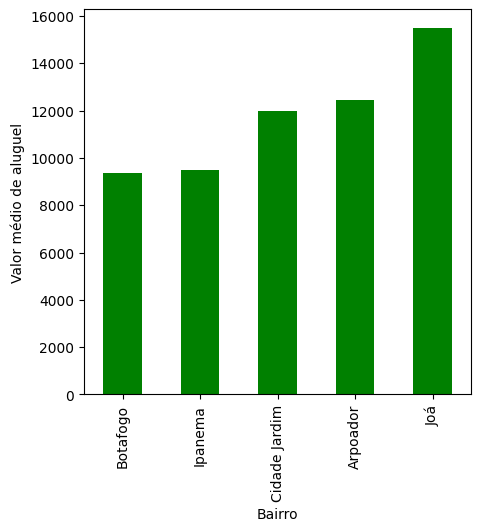

In [61]:
bairros_mais_caros.plot(kind = 'bar', figsize = (5,5), color = 'green', xlabel = 'Bairro', ylabel = "Valor médio de aluguel")

## Aula 3

Importe novamente o arquivo [**alunos.csv**](https://raw.githubusercontent.com/alura-cursos/pandas-conhecendo-a-biblioteca/main/desafios/alunos.csv) para realizar os desafios abaixo.

In [62]:
# Importando novamente os dados
url2 = 'https://raw.githubusercontent.com/alura-cursos/pandas-conhecendo-a-biblioteca/main/desafios/alunos.csv'
dados2 = pd.read_csv(url2)
dados2

,Nome,Idade,Notas,Aprovado
0,Ary,20,7.5,True
1,Ana,18,NaN,False
2,Cátia,27,2.5,False
3,Denis,18,5.0,False
4,Beto,21,10.0,True
5,Bruna,23,NaN,False
6,Dara,21,7.0,True
7,Carlos,19,6.0,True
8,Alice,35,5.6,False
9,Vitor,28,NaN,False


### Desafio 1
Verifique se a base de dados possui dados nulos e caso tenha, realize o tratamento desses dados nulos

In [63]:
#O comando abaixo vai retornar as celulas como 'False' se o valor existir ou 'True' se o valor não existir/for nulo
dados2.isnull()

,Nome,Idade,Notas,Aprovado
0,False,False,False,False
1,False,False,True,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
5,False,False,True,False
6,False,False,False,False
7,False,False,False,False
8,False,False,False,False
9,False,False,True,False


In [64]:
#O comando abaixo exibe o valor de itens nulos por coluna, atraves da soma dos dados "true" = 1
dados2.isnull().sum()

,0
Nome,0
Idade,0
Notas,6
Aprovado,0


In [65]:
#Substitui os valores nulos por 0, outras tratativas podem ser feitas como utilizar remover as linhas que contenham valores nulos (dropna),
#preencher com valores vizinhos/proximos (ffill, bfill, interpolate)
df2 = dados2.fillna(0)
df2

,Nome,Idade,Notas,Aprovado
0,Ary,20,7.5,True
1,Ana,18,0.0,False
2,Cátia,27,2.5,False
3,Denis,18,5.0,False
4,Beto,21,10.0,True
5,Bruna,23,0.0,False
6,Dara,21,7.0,True
7,Carlos,19,6.0,True
8,Alice,35,5.6,False
9,Vitor,28,0.0,False


### Desafio 2
Os alunos "Alice" e "Carlos", não fazem mais parte da turma. Sendo assim, remova-os da base de dados

In [66]:
#O comando drop vai remores os elementos 7, 8. Axis indica coluna (1) e linha (0), nesse caso serão excluidas as linhas 7 e 8.
#o comando inplace=True faz a variavel df2 ser subscrita sem as linhas 7 e 8
df2.drop([7, 8], axis=0, inplace=True)
df2

,Nome,Idade,Notas,Aprovado
0,Ary,20,7.5,True
1,Ana,18,0.0,False
2,Cátia,27,2.5,False
3,Denis,18,5.0,False
4,Beto,21,10.0,True
5,Bruna,23,0.0,False
6,Dara,21,7.0,True
9,Vitor,28,0.0,False
10,Daniel,21,0.0,False
11,Igor,24,4.5,False


### Desafio 3
Aplique um filtro que selecione apenas os alunos que foram aprovados

In [67]:
#a primeira linha do comando faz a seleção e retorna uma series do tipo boleana (true ou false)
#a segunda linha do codigo retorna um dataframe com base na seleção feita da linha um
aprovados = df2['Notas'] >= 6
df2[aprovados]

,Nome,Idade,Notas,Aprovado
0,Ary,20,7.5,True
4,Beto,21,10.0,True
6,Dara,21,7.0,True
12,Sthefanie,26,9.5,True
13,Mirla,25,9.0,True
15,Mylena,29,7.0,True
17,Nadia,34,8.0,True


### Desafio 4
Salve o DataFrame que possui apenas os alunos aprovados em um arquivo csv chamado "alunos_aprovados.csv"

In [68]:
alunos_aprovados = df2[aprovados]
alunos_aprovados

,Nome,Idade,Notas,Aprovado
0,Ary,20,7.5,True
4,Beto,21,10.0,True
6,Dara,21,7.0,True
12,Sthefanie,26,9.5,True
13,Mirla,25,9.0,True
15,Mylena,29,7.0,True
17,Nadia,34,8.0,True


In [69]:
alunos_aprovados.to_csv('alunos_aprovados.csv')

### **Extra**
Ao conferir as notas dos alunos aprovados, notamos que algumas notas estavam incorretas. As alunas que tiraram nota 7.0, na verdade tinham um ponto extra que não foi contabilizado. Sendo assim, substitua as notas 7.0 da base de dados por 8.0. **Dica**: pesquise pelo método **replace**

In [80]:
df2['Notas'] = df2['Notas'].replace(7, 8) #faz a troca de 7 por 8
aprovados = (df2['Notas'] >= 6) #cria uma variavel com os alunos aprovados
df2[aprovados] #exibe um dataframe com o filtro da variavel aprovados

,Nome,Idade,Notas,Aprovado
0,Ary,20,7.5,True
4,Beto,21,10.0,True
6,Dara,21,8.0,True
12,Sthefanie,26,9.5,True
13,Mirla,25,9.0,True
15,Mylena,29,8.0,True
17,Nadia,34,8.0,True


## Aula 4

Importe novamente o arquivo [**alunos.csv**](https://raw.githubusercontent.com/alura-cursos/pandas-conhecendo-a-biblioteca/main/desafios/alunos.csv) para realizar os desafios abaixo.

In [81]:
# Importando novamente os dados
url3 = 'https://raw.githubusercontent.com/alura-cursos/pandas-conhecendo-a-biblioteca/main/desafios/alunos.csv'
dados3 = pd.read_csv(url3)
dados3.head()

,Nome,Idade,Notas,Aprovado
0,Ary,20,7.5,True
1,Ana,18,NaN,False
2,Cátia,27,2.5,False
3,Denis,18,5.0,False
4,Beto,21,10.0,True


### Desafio 1
Os alunos participaram de uma atividade extracurricular e ganharam pontos extras. Esses pontos extras correspondem a 40% da nota atual de cada um deles. Com base nisso, crie uma coluna chamada "Pontos_extras" que contenha os pontos extras de cada aluno, ou seja, 40% da nota atual deles

In [92]:
df3 = dados3.fillna(0)
df3['Pontos_extras'] = df3['Notas'] * (4/10)
df3.head()

,Nome,Idade,Notas,Aprovado,Pontos_extras
0,Ary,20,7.5,True,3.0
1,Ana,18,0.0,False,0.0
2,Cátia,27,2.5,False,1.0
3,Denis,18,5.0,False,2.0
4,Beto,21,10.0,True,4.0


### Desafio 2
Crie mais uma coluna, chamada "Notas_finais" que possua as notas de cada aluno somada com os pontos extras

In [95]:
df3['Notas_finais'] = df3['Notas'] + df3['Pontos_extras']
df3.head()

,Nome,Idade,Notas,Aprovado,Pontos_extras,Notas_finais
0,Ary,20,7.5,True,3.0,10.5
1,Ana,18,0.0,False,0.0,0.0
2,Cátia,27,2.5,False,1.0,3.5
3,Denis,18,5.0,False,2.0,7.0
4,Beto,21,10.0,True,4.0,14.0


### Desafio 3
Como os alunos ganharam pontos extras, alguns que não tinham sido aprovados antes podem ter sido aprovados agora. Com base nisso, crie uma coluna chamada "Aprovado_final" com os seguintes valores:

* True: caso o aluno esteja aprovado (nota final deve ser maior ou igual a 6);
* False: caso o aluno esteja reprovado (nota final deve ser menor que 6).


In [98]:
df3['Aprovado_final'] = df3['Notas_finais'] >= 6
df3.head()

,Nome,Idade,Notas,Aprovado,Pontos_extras,Notas_finais,Aprovado_final
0,Ary,20,7.5,True,3.0,10.5,True
1,Ana,18,0.0,False,0.0,0.0,False
2,Cátia,27,2.5,False,1.0,3.5,False
3,Denis,18,5.0,False,2.0,7.0,True
4,Beto,21,10.0,True,4.0,14.0,True


### Desafio 4
Faça uma seleção e verifique quais alunos não tinham sido aprovados anteriormente, mas foram aprovados após a soma dos pontos extras

In [107]:
selecao = (df3['Aprovado'] == 0) & (df3['Aprovado_final'] == 1)
df3[selecao]

,Nome,Idade,Notas,Aprovado,Pontos_extras,Notas_finais,Aprovado_final
3,Denis,18,5.0,False,2.00,7.00,True
8,Alice,35,5.6,False,2.24,7.84,True
11,Igor,24,4.5,False,1.80,6.30,True
